In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\austi\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#X_values_raw = pd.read_csv("../../ETL/output_file/state_X_values_proj3.csv")

#X_values_raw

df = pd.read_csv("../Resources/non_race_data.csv")
df

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [106]:
X = df.drop(columns=["year", "state", "id", "state_code", "latitude", "longitude", "deaths", "births", "maternal_mortality_ratio", "population", "employer", "non_group", "medicaid", "medicare", "military", "uninsured"])
#X = df.drop(columns=["year","id", "state_code", "latitude", "longitude", "deaths", "births", "maternal_mortality_ratio", "population", "employer", "non_group", "medicaid", "medicare", "military", "uninsured"])
#X = pd.get_dummies(X, columns=["state"])
X

,air_pollution_val,cancer_death_val,cardio_death_val,child_pov_val,choles_check_val,dent_vis_val,dentists_val,diabetes_val,drug_deaths_val,health_stat_fem_val,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,9.5,211.6,330.1,25.2,77.6,60.0,44.0,12.9,12.0,43.5,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,9.1,211.1,332.9,22.3,79.9,60.0,43.8,13.5,13.1,43.8,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,8.9,210.6,339.6,24.3,79.9,62.3,43.7,14.6,14.3,43.8,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,8.4,210.5,342.6,24.5,87.5,62.3,40.4,14.1,15.4,43.5,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,8.1,210.8,347.0,23.8,87.5,60.8,41.8,14.5,16.1,41.1,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,9.3,193.2,236.8,15.9,76.6,72.0,54.8,8.2,11.8,53.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,9.1,193.3,237.2,16.2,76.6,70.1,56.0,9.0,13.1,54.1,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,7.9,191.6,236.8,18.3,77.5,70.1,55.3,8.4,14.0,54.3,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,7.4,191.7,238.1,16.3,77.5,72.6,55.9,9.8,15.1,54.1,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [107]:
y = df['maternal_mortality_ratio'].values.reshape(-1, 1)
y

array([[20.11],
       [59.17],
       [69.56],
       [53.67],
       [59.71],
       [19.43],
       [17.54],
       [28.92],
       [26.87],
       [27.62],
       [23.43],
       [29.58],
       [29.31],
       [29.73],
       [40.31],
       [50.24],
       [33.73],
       [25.83],
       [46.94],
       [39.65],
       [59.72],
       [41.15],
       [44.42],
       [37.31],
       [62.13],
       [38.29],
       [20.3 ],
       [16.07],
       [14.14],
       [16.08],
       [15.56],
       [17.5 ],
       [17.08],
       [18.62],
       [19.08],
       [17.81],
       [15.9 ],
       [18.46],
       [24.31],
       [15.02],
       [24.02],
       [27.96],
       [23.86],
       [37.55],
       [31.23],
       [32.07],
       [21.9 ],
       [23.43],
       [30.03],
       [38.53],
       [28.18],
       [30.32],
       [22.22],
       [21.46],
       [24.37],
       [31.36],
       [25.46],
       [28.37],
       [36.25],
       [30.7 ],
       [63.69],
       [79.42],
       [

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler


# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [110]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

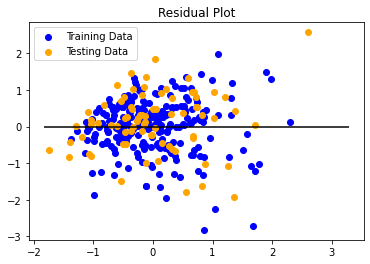

In [112]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6689554231844855, R2: 0.37467367188280853


In [114]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6668634481445239, R2: 0.3766292088661619


In [115]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6688902182460348, R2: 0.37473462417248793


In [116]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.658575890846808, R2: 0.38437625387757857


In [117]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

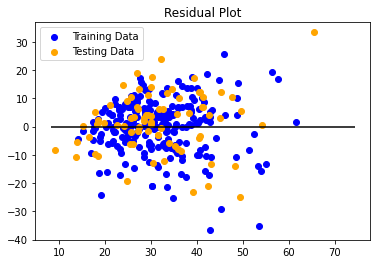

In [118]:
predictions2 = model2.predict(X_test)
model2.fit(X_train, y_train)
plt.scatter(model2.predict(X_train), model2.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test), model2.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [119]:
MSE = mean_squared_error(y_test, predictions2)
r2 = model2.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 112.19158211946625, R2: 0.3746736718828072


In [120]:
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions2 = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions2)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 111.84344382009698, R2: 0.37661410306586807


In [121]:
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions2 = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1060.582531175711, R2: 0.3747682479096365


In [122]:
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions2 = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions2)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 111.88193389517245, R2: 0.3763995695254616
